# Linear Classification Using Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/AIMOOC")

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import sklearn.linear_model as lm 
import matplotlib.pyplot as plt

Mounted at /content/drive/


## Read the data

In [ ]:
df = pd.read_csv("/content/drive/My Drive/AIMOOC/Modules/Module4/Data/students.csv")
df 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Plot the math vs. reading scores and fit a line

Coefficients: [0.78722924]
Intercept: 17.141806785685297


0.6684365064501092

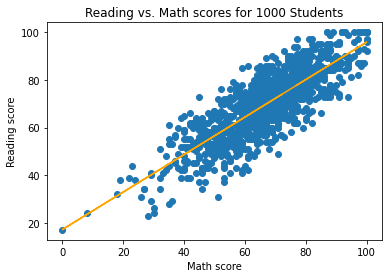

In [ ]:
x = df[["math score"]]
y = df["reading score"]
plt.scatter(x, y)

lin_reg = lm.LinearRegression()
lin_reg.fit(x, y) 
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

ypred = lin_reg.predict(x)
plt.plot(x, ypred, color="orange")
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.title("Reading vs. Math scores for 1000 Students")

lin_reg.score(x, y) 

## Predict a coordinate on the line

In [ ]:
lin_reg.predict([[40]]) 

array([48.63097637])

## Do the classification for a given a math score



The reading score of 20  is below average for math score of 40
The reading score of 40  is below average for math score of 40
The reading score of 60  is above average for math score of 40
The reading score of 80  is above average for math score of 40


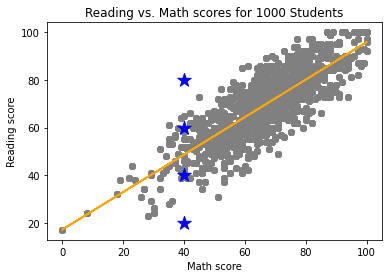

In [ ]:
def do_fit_and_classify_stud(math_score, read_score):
  x = df[["math score"]]
  y = df["reading score"]
  lin_reg = lm.LinearRegression()
  lin_reg.fit(x, y)

  plt.scatter(x, y, color="grey")
  ypred = lin_reg.predict(x)
  plt.plot(x, ypred, color="orange")
  plt.xlabel("Math score")
  plt.ylabel("Reading score")
  plt.title("Reading vs. Math scores for 1000 Students")

  plt.scatter([math_score], [read_score], color="blue", marker='*', s=200, zorder=100)

  pred_reading_score = int(lin_reg.predict([[math_score]]))
  if read_score>pred_reading_score:
    print("The reading score of",read_score," is above average for math score of",math_score)
  else:
    print("The reading score of",read_score," is below average for math score of",math_score)
      
do_fit_and_classify_stud(40, 20) 
do_fit_and_classify_stud(40, 40)
do_fit_and_classify_stud(40, 60)
do_fit_and_classify_stud(40, 80)
